In [1]:
#PUT ALL IMPORTS UP HEREEE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [5]:
#Show dataframe attributes and clean up data that is irrelevant to our goal
df = pd.read_csv('global-data-on-sustainable-energy (1).csv') 
df = df.drop(columns = ['Latitude', 'Longitude', 'Land Area(Km2)', 'Electricity from nuclear (TWh)', 'Access to clean fuels for cooking', 'Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)'])

df.head()

#Keeping rows of only the 10 countries that will be used for our analyses 
countries = ['Bahrain', 'Libya', 'Jordan', 'Iraq', 'Lebanon', 'United Arab Emirates', 'Kuwait', 'Oman', 'Qatar']

data = df[df['Entity'].isin(countries)]

data = data.dropna()
'''
MAY OR MAY NOT NEED 
# Calculate year-over-year CO2 emissions change
data['CO2_Gain_YOY'] = data.groupby('Entity')['Value_co2_emissions_kt_by_country'].diff()

# Display the updated DataFrame to check the results
data[['Entity', 'Year', 'Value_co2_emissions_kt_by_country', 'CO2_Gain_YOY']].head(10)
'''
print(len(data))
data.head(210)

#CONSTRUCT FEATURES THAT WILL BE USED IN ANALYSYS

179


,Entity,Year,Access to electricity (% of population),Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2)
252,Bahrain,2000,100.0,0.00,0.00,13.02,0.00,0.000000,157253.03,10.43,15880.00000,5.300070,13636.41675,"2,239"
253,Bahrain,2001,100.0,0.00,0.00,13.74,0.00,0.000000,158559.69,10.41,16390.00000,2.490948,12868.17692,"2,239"
254,Bahrain,2002,100.0,0.00,0.00,14.34,0.00,0.000000,165096.56,10.45,17219.99931,3.348551,13049.90973,"2,239"
255,Bahrain,2003,100.0,0.00,0.00,14.76,0.00,0.000000,165859.02,10.30,17940.00053,6.296442,14222.03680,"2,239"
256,Bahrain,2004,100.0,0.00,0.00,15.18,0.00,0.000000,160432.52,9.83,17930.00031,6.980961,15846.50595,"2,239"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,United Arab Emirates,2015,100.0,14.71,0.13,119.45,0.31,0.258851,137896.34,5.56,195240.00550,5.060335,38663.40050,118
3476,United Arab Emirates,2016,100.0,15.12,0.12,121.53,0.32,0.262618,142115.27,5.96,201080.00180,2.984216,38141.86713,118
3477,United Arab Emirates,2017,100.0,37.54,0.19,125.79,0.75,0.592698,135601.27,4.54,197039.99330,2.373551,40644.79119,118
3478,United Arab Emirates,2018,100.0,62.24,0.32,126.61,1.32,1.031814,132789.17,4.11,177119.99510,1.189856,43839.32449,118


### **Correlation Matrix** ###

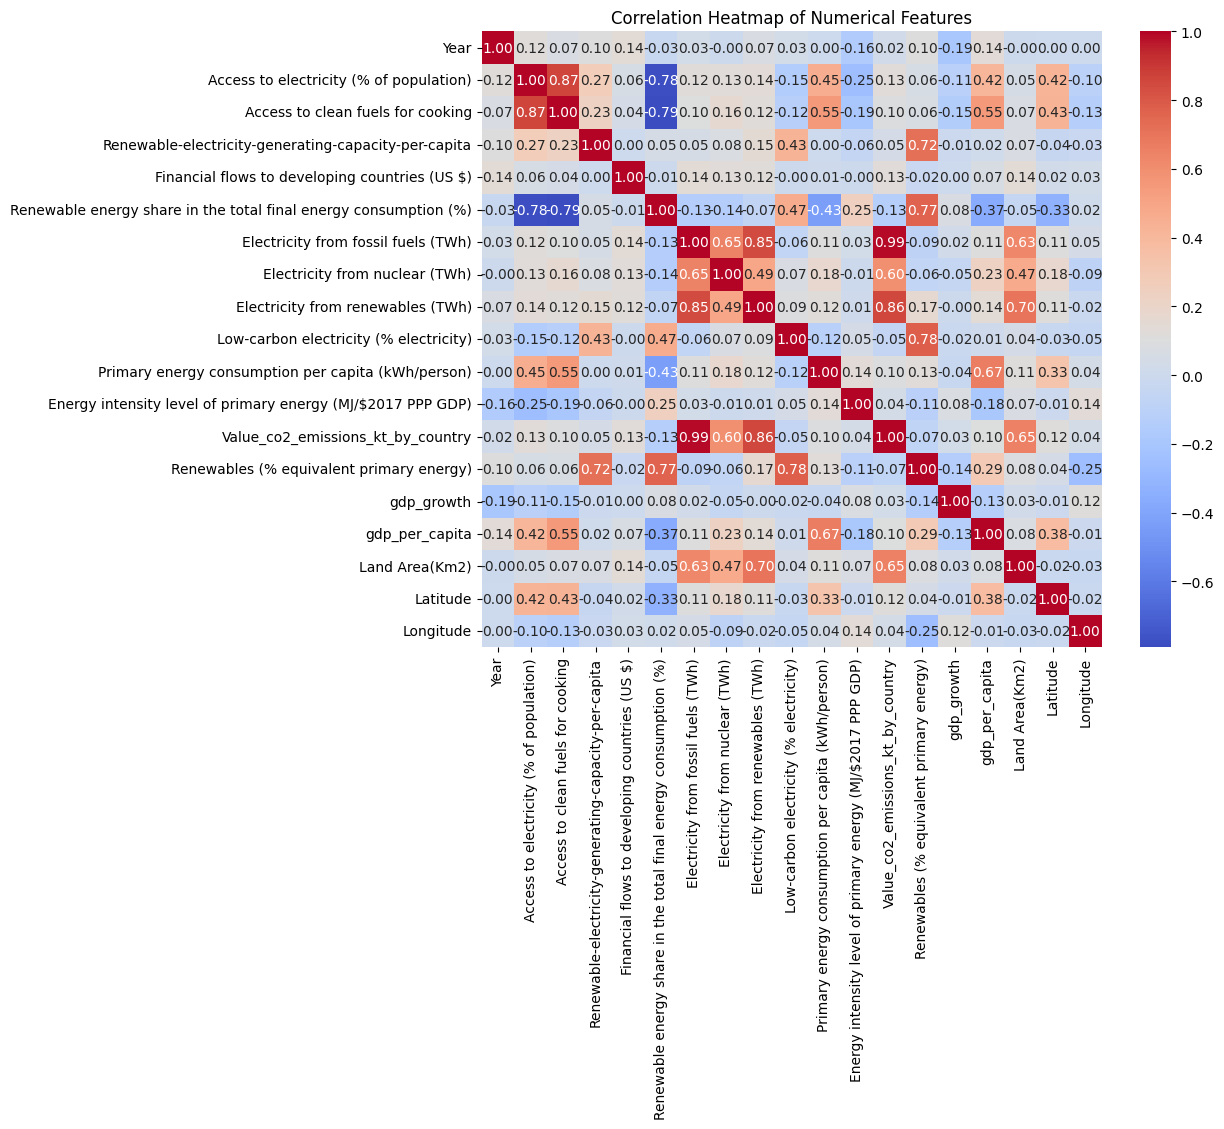

Top 5 most correlated features with 'Value_co2_emissions_kt_by_country':
1. Electricity from fossil fuels (TWh): Correlation = 0.9897
2. Electricity from renewables (TWh): Correlation = 0.8563
3. Land Area(Km2): Correlation = 0.6537
4. Electricity from nuclear (TWh): Correlation = 0.5985
5. Access to electricity (% of population): Correlation = 0.1270

Top 5 most correlated features with 'gdp_per_capita':
1. Primary energy consumption per capita (kWh/person): Correlation = 0.6672
2. Access to clean fuels for cooking: Correlation = 0.5452
3. Access to electricity (% of population): Correlation = 0.4185
4. Latitude: Correlation = 0.3821
5. Renewables (% equivalent primary energy): Correlation = 0.2925

Top 5 most correlated features with 'Primary energy consumption per capita (kWh/person)':
1. gdp_per_capita: Correlation = 0.6672
2. Access to clean fuels for cooking: Correlation = 0.5513
3. Access to electricity (% of population): Correlation = 0.4549
4. Latitude: Correlation = 0.3299
5.

In [5]:
# Load the dataset
df = pd.read_csv('global-data-on-sustainable-energy (1).csv')

# Select only the numerical features from the dataset
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numerical features
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
correlation_matrix

# Plot a heatmap to visualize the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Identify the top 5 most correlated features with the target variable CO2 Emissions ('Value_co2_emissions_kt_by_country')
target = 'Value_co2_emissions_kt_by_country'
most_correlated_features = correlation_matrix[target].sort_values(ascending=False)[1:6]  # Skip the target itself
print("Top 5 most correlated features with 'Value_co2_emissions_kt_by_country':")

# Iterate through these features
for i, feature in enumerate(most_correlated_features.index, start=1):
    print(f"{i}. {feature}: Correlation = {most_correlated_features[feature]:.4f}")

print() #empty line

# Identify the top 5 most correlated features with the target variable gdp growth per capita ('gdp_per_capita')
target = 'gdp_per_capita'
most_correlated_features = correlation_matrix[target].sort_values(ascending=False)[1:6]  # Skip the target itself
print("Top 5 most correlated features with 'gdp_per_capita':")

# Iterate through these features
for i, feature in enumerate(most_correlated_features.index, start=1):
    print(f"{i}. {feature}: Correlation = {most_correlated_features[feature]:.4f}")

print() #empty line

# Identify the top 5 most correlated features with the target variable primary energy consumption per consumption per capita ('Primary energy consumption per capita (kWh/person)')
target = 'Primary energy consumption per capita (kWh/person)'
most_correlated_features = correlation_matrix[target].sort_values(ascending=False)[1:6]  # Skip the target itself
print("Top 5 most correlated features with 'Primary energy consumption per capita (kWh/person)':")

# Iterate through these features
for i, feature in enumerate(most_correlated_features.index, start=1):
    print(f"{i}. {feature}: Correlation = {most_correlated_features[feature]:.4f}")

## Finding features that correlate most with C02 Emmisions



Correlations with CO2 Emissions:
Electricity from fossil fuels (TWh)                                    0.934235
Renewable energy share in the total final energy consumption (%)       -0.412145
gdp_per_capita                                                         0.359253
Electricity from renewables (TWh)                                      0.317732
Primary energy consumption per capita (kWh/person)                     0.180025
Renewable-electricity-generating-capacity-per-capita                   0.170942
Energy intensity level of primary energy (MJ/$2017 PPP GDP)            -0.114676
Access to electricity (% of population)                                0.059212
Low-carbon electricity (% electricity)                                 0.004937
gdp_growth                                                             -0.004557


C:\Users\User\AppData\Local\Temp\ipykernel_18728\243374257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation with CO2 Emissions', y='Feature', data=correlations_df, palette='coolwarm')


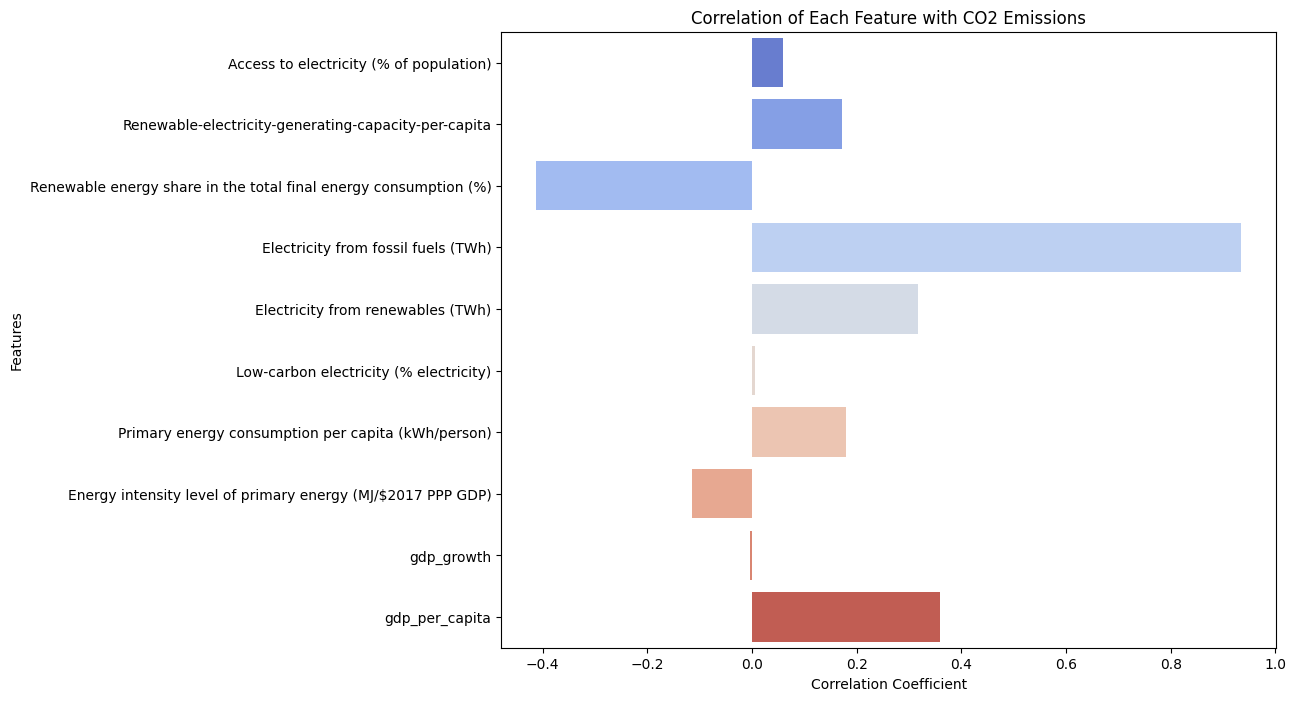

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume the CO2 emissions column is named 'Value_co2_emissions_kt_by_country'
target_variable = 'Value_co2_emissions_kt_by_country'

# Select only numerical columns, excluding the target variable
numerical_columns = data.select_dtypes(include=['float64', 'int64']).drop(columns=[target_variable, 'Year'])

# Calculate correlations of all features with the target variable (CO2 emissions)
correlations_with_co2 = numerical_columns.corrwith(data[target_variable])

# Convert to a DataFrame for easier plotting
correlations_df = correlations_with_co2.to_frame().reset_index()
correlations_df.columns = ['Feature', 'Correlation with CO2 Emissions']

# Sort the DataFrame by the absolute value of correlations
correlations_df['Absolute Correlation'] = correlations_df['Correlation with CO2 Emissions'].abs()
correlations_df_sorted = correlations_df.sort_values(by='Absolute Correlation', ascending=False).drop(columns='Absolute Correlation')

print("\nCorrelations with CO2 Emissions:")
for index, row in correlations_df_sorted.iterrows():
    print(f"{row['Feature']:<70} {row['Correlation with CO2 Emissions']:.6f}")

# Plot the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x='Correlation with CO2 Emissions', y='Feature', data=correlations_df, palette='coolwarm')
plt.title('Correlation of Each Feature with CO2 Emissions'), 
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


Feature Importance Ranking:
                                              Feature  Importance
3                 Electricity from fossil fuels (TWh)    0.922507
2   Renewable energy share in the total final ener...    0.033985
10                                   Density\n(P/Km2)    0.016409
1   Renewable-electricity-generating-capacity-per-...    0.006756
4                   Electricity from renewables (TWh)    0.006167
5              Low-carbon electricity (% electricity)    0.005581
7   Energy intensity level of primary energy (MJ/$...    0.004287
9                                      gdp_per_capita    0.002621
8                                          gdp_growth    0.000901
6   Primary energy consumption per capita (kWh/per...    0.000487
0             Access to electricity (% of population)    0.000300

Model Performance:
Mean Squared Error (MSE): 108247160.31
R-squared (R²): 0.91


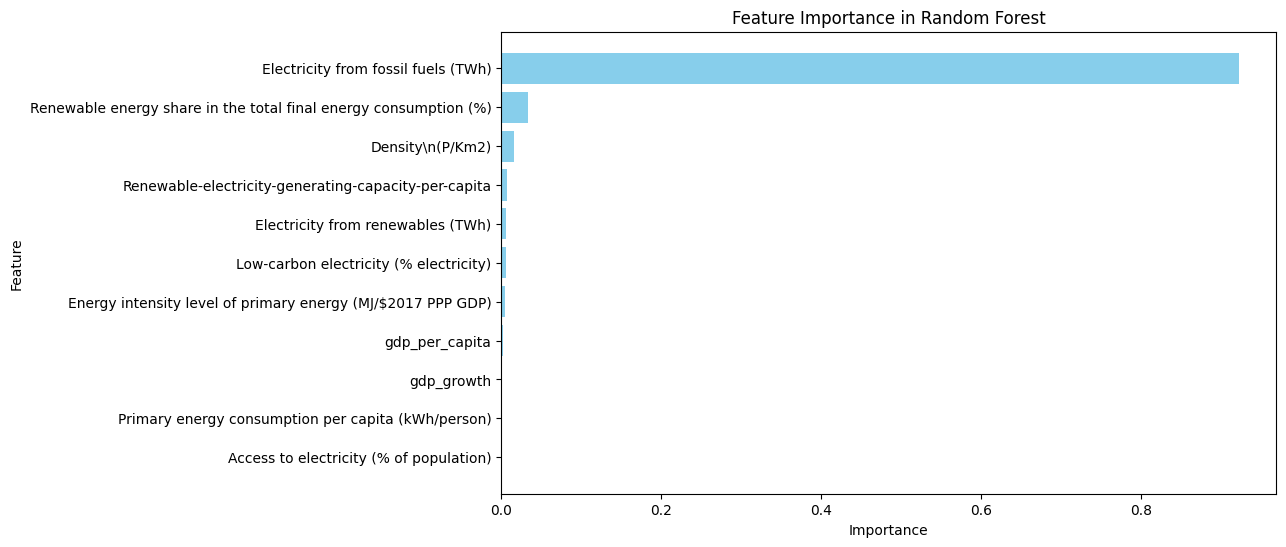

In [ ]:
#ALL DEBUGGING LINES CAN PROBABLY BE REMOVED WHEN WERE DONE THE PROJECT, ONLY HERE TO HELP WITH CHECKING EVERYTHING IS WORKING

#Check the plot it seems pretty valid based on the dataset that we have, but I dont know if it is a valid thing for the Random Forest
# we can change the target variable if we need to as well, just used this as an example.

# DEBUGGING: because columns were showing errors so printing column names to see if target exists
#print("Available columns in the dataset:")
#print(df.columns)

#Defining the target column

#DEBUGGING: Checking if the target column exists in the dataset also
#if target_variable not in data.columns:
#   raise ValueError(f"Target column '{target_variable}' is not found in the dataset. Please verify the column name.")

# DEBUGGING to make sure the target column is working: Inspecting the target column before cleaning
#print(f"\nPreview of the target column '{target_variable}' before cleaning:")
#print(data[target_variable].head())

#ALL OF THE LINES ABOVE CAN BE DELETED

# Removing commas to make it numerical
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Dropping rows where the target column is NaN
data_cleaned = data.dropna(subset=[target_variable])

#DEBUGGING to see dimensions after dropping the rows
#print(f"Dataset dimensions after cleaning: {data_cleaned.shape}") #This can be removed in the final submission

# Defining features and target
features = data_cleaned.drop(columns=[target_variable, 'Entity', 'Year'], errors='ignore')
target = data_cleaned[target_variable]

# Seeing if features and target are aligned
#if len(features) != len(target):
 #   raise ValueError("Features and target variable have mismatched lengths after preprocessing.")

# DEBUGGING: Displaying dataset summary for 
#print(f"Features shape: {features.shape}")
#print(f"Target shape: {target.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Training the Random Forest Regressor but reducing overfitting
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10,  # Limiting tree depth
    min_samples_split=10,  # Minimum samples needed to split an internal node
    min_samples_leaf=5,  # Minimum samples in leaf nodes
    random_state=42
)
rf_model.fit(X_train, y_train)

# Evaluating feature importance
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Displaying feature importance
print("Feature Importance Ranking:")
print(feature_importances)

# Predicting and evaluating model performance
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()